# Werewolf Among Us: Human vs LLM Analysis

EDA and comparison of the datasets

In [116]:
import ast
import os
import json
import random 
from collections import Counter

import pandas as pd
import numpy as np

# Viz
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# pio.renderers.default = "notebook_connected+plotly_mimetype+png"
# For some reason, the correct setting to get the plots to show up in Quarto HTML?
pio.renderers.default = "notebook_connected+plotly_mimetype+png"

In [131]:
## Plotly graph gen setup

# Just have the green more prominent, move red down
cust_colorseq = ['#636EFA',
                '#00CC96',
                '#FFA15A',
                '#EF553B',
                '#AB63FA',
                '#19D3F3',
                '#FF6692',
                '#B6E880',
                '#FF97FF',
                '#FECB52']

# Generated figure margin
mn = 10

pio.templates["custom"] = go.layout.Template(layout=go.Layout(
        # xaxis=dict(showgrid=False,
        #            showline=True,
        #            linewidth=2,
        #            linecolor="black",
        #           ),
        #  yaxis=dict(showgrid=False,
        #             showline=True,
        #            linewidth=2,
        #            linecolor="black",
        #            ticks="outside", # Show ticks
        #            ),
        #  paper_bgcolor='rgba(255,255,255,1)',
        #  plot_bgcolor='rgba(255,255,255,1)',
        #  legend=dict(xanchor="right",
        #             yanchor="bottom",
        #             y=1.02,
        #             x=1,
        #             title=dict(text="Model")),
        # font=dict(size=15),
        margin=dict(l=mn, r=mn, t=mn + 30, b=mn),
        colorway=cust_colorseq,
                    ),
     data=go.layout.template.Data()
    )
pio.templates.default = "plotly+custom"

pd.options.display.max_colwidth = 150

## Load data

In [63]:
hum_datapath = os.path.normpath("../Data/Output/EDA_WAU")
llm_datapath = os.path.normpath("../Data/Output/EDA_WA")

hum_rounds_df = pd.read_csv(os.path.join(hum_datapath, "allrounds.csv"), index_col=0)
hum_text_df = pd.read_csv(os.path.join(hum_datapath, "alltext.csv"), index_col=0)
hum_text_df["strategy"] = hum_text_df["strategy"].apply(ast.literal_eval)

llm_rounds_df = pd.read_csv(os.path.join(llm_datapath, "allrounds.csv"), index_col=0)
llm_rounds_df["players"] = llm_rounds_df["players"].apply(ast.literal_eval)
llm_rounds_df["roles"] = llm_rounds_df["roles"].apply(ast.literal_eval)
llm_rounds_df["models"] = llm_rounds_df["models"].apply(ast.literal_eval)


llm_text_df = pd.read_csv(os.path.join(llm_datapath, "alltext.csv"), index_col=0)
llm_text_df["players"] = llm_text_df["players"].apply(ast.literal_eval)
llm_text_df["roles"] = llm_text_df["roles"].apply(ast.literal_eval)
llm_text_df["models"] = llm_text_df["models"].apply(ast.literal_eval)
# llm_text_df["votes"] = llm_text_df["votes"].apply(ast.literal_eval, )
llm_text_df["strategy"] = llm_text_df["strategy"].apply(ast.literal_eval)

In [45]:
hum_rounds_df.head()

,game_id,speaker,source,voted_for,role,votes_target,winner
0,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,jessica,Seer,jessica,Villagers
1,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kaelan,Ego4D,jessica,Center card,jessica,Villagers
2,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,jessica,Ego4D,NaN,Werewolf,jessica,Villagers
3,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,daniel,Ego4D,daniel,Werewolf,jessica,Villagers
4,game9 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,NaN,Troublemaker,NaN,Werewolves


In [64]:
llm_rounds_df.head()

,players,eliminated,unmasked,protected,exiled,success,game_id,winner,round,roles,models
0,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew...","[gpt-4o-2024-05-13, gpt-4o-2024-05-13, gpt-4o-..."
1,"[Harold, Sam, Jackson, Hayley, Jacob, Mason]",Will,NaN,Sam,NaN,True,861,Werewolves,1,"[Villager, Villager, Villager, Werewolf, Werew...","[gpt-4o-2024-05-13, gpt-4o-2024-05-13, gpt-4o-..."
2,"[Sam, Hayley, Jacob, Mason]",Harold,NaN,Sam,Jackson,True,861,Werewolves,2,"[Villager, Werewolf, Werewolf, Doctor]","[gpt-4o-2024-05-13, gpt-4o-2024-05-13, gpt-4o-..."
3,"[Jackson, Mason, Ginger, Scott, Sam, Jacob]",Paul,Paul,Jackson,Dan,True,577,Villagers,0,"[Villager, Villager, Werewolf, Werewolf, Docto...","[gpt-4.1-2025-04-14, gpt-4.1-2025-04-14, deeps..."
4,"[Jackson, Scott, Sam, Jacob]",Mason,Ginger,Sam,Ginger,True,577,Villagers,1,"[Villager, Werewolf, Doctor, Seer]","[gpt-4.1-2025-04-14, deepseek-chat, gpt-4.1-20..."


In [107]:
#| label: tbl-data-hum
#| tbl-cap: The Werewolf Among Us human dataset, where each data row is per utterance. 
#| column: screen-inset-shaded

hum_text_df.sample(5).style.set_properties(subset=["text", "strategy"], **{"font-weight": "bold"})

,Rec_Id,speaker,timestamp,text,strategy,source,utterance_length,game_id,voted_for,end_role,votes_target,winner
6921,87,brett,219,I'm 100% a Villager which makes me think he was the Werewolf and he saw Seer in the middle.,"['Identity Declaration', 'Accusation']",Youtube,19,game1 - One Night Ultimate Werewolf 1 How-To and Playthrough,katie,Villager,brett,Werewolves
4013,110,chris,305,"Wait, but you know-",['No Strategy'],Ego4D,4,game1 - 698f6bbe-4347-4a06-bd5d-3482f5e4fbbe,ashley,Drunk,ashley,Villagers
12742,76,dustin,278,"We're trying to go, we're... What?",['Interrogation'],Youtube,6,game1 - One Night Ultimate Werewolf 382 Game 100!!,dylan,Werewolf,dylan,Werewolves
3644,67,margaret,257,So that means that you were a liar. Which makes you a Werewolve. Because,['Accusation'],Ego4D,14,game8 - 2ba4023c-a8bf-43ad-ad5a-80ba222ce990,erin,Hunter,clint,Villagers
15832,76,mitchell,291,That's all I'm saying.,['Defense'],Youtube,4,game6 - ONE NIGHT ULTIMATE WEREWOLF Retro 1,justin,Robber,justin,Villagers


In [133]:
#| label: tbl-data-llm
#| tbl-cap: The  generated Werewolf Arena LLM dataset, where each data row is per utterance. 
#| column: screen-inset-shaded

llm_text_df.drop(columns="votes").sample(3).style.set_properties(subset=["text", "strategy"], **{"font-weight": "bold"})

,players,eliminated,unmasked,protected,exiled,success,game_id,winner,round,roles,models,speaker,text,timestamp,strategy
270,"['Derek', 'Dan', 'Jackson', 'Jacob', 'Leah']",Paul,Sam,nan,Sam,True,370,Werewolves,1,"['Villager', 'Villager', 'Villager', 'Villager', 'Werewolf']","['gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18']",Sam,"I think it's crucial to directly address what has been said here. Dan and Jacob, while your intentions may seem noble, your accusations against both me and Jackson feel premature. Jackson’s defensiveness about his silence is interesting; it suggests a possible awareness of how closely watched he is, perhaps even an effort to divert our attention away from him. Why not explore that angle further? It’s also concerning to me that both of you are so eager to cast the spotlight on me rather than taking a broader look at behaviors. In fact, I've been thinking that we need to channel our discussions productively. It seems like Jackson is trying to deflect by putting focus on our scrutiny rather than addressing the core issues at hand—shouldn't we be questioning why he feels so defensive? If we're truly going to work together as a team, we must evaluate everyone's actions equally. We could simply be underestimating the potential threat that is right in front of us.",11,"['Interrogation', 'Accusation', 'Call for Action', 'Identity Declaration']"
5,"['Harold', 'Will', 'Sam', 'Jackson', 'Hayley', 'Jacob', 'Mason']",Dan,Will,Hayley,nan,True,861,Werewolves,0,"['Villager', 'Villager', 'Villager', 'Villager', 'Werewolf', 'Werewolf', 'Doctor']","['gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13']",Harold,"I think everyone is bringing up some excellent points. I agree that we need to pay close attention to both extremes of behavior—those who are overly vocal and those who might be unusually silent. However, let’s also be cautious not to jump to conclusions too hastily. We need to gather as much information as possible. I suggest we keep a mental note of everyone's behavior and remarks. If someone claims to be the Seer or Doctor down the line, we should be ready to analyze and corroborate their information carefully. For now, let’s continue our observations and avoid rushing our decisions. Does anyone recall anything specific from the night phase or have any gut feelings about someone's behavior so far?",5,"['Interrogation', 'Accusation', 'Call for Action']"
130,"['David', 'Bert', 'Jacob', 'Harold', 'Mason', 'Will']",Will,Hayley,Will,Hayley,True,289,Villagers,1,"['Villager', 'Villager', 'Villager', 'Werewolf', 'Doctor', 'Seer']","['gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18']",Jacob,"I appreciate the concerns raised about my quietness earlier. Let me clarify my position: I’m Jacob, a Villager, and I'm committed to working with all of you to identify the Werewolves among us. Will has claimed to be the Seer, and I think we should trust him, especially since he backed me up without hesitation. Mason’s reveal about protecting David is another point that adds insight into our discussions. We have to pay close attention to Hayley’s pushback on Will’s confidence and my behavior; it seems like a tactic to create doubt where we should be building trust. We need to focus on collaboration, so how about we scrutinize those who have been less vocal? Bert and Harold have echoed concerns about trust, which is valuable, but we need to ensure we channel that energy into identifying players who are not contributing. Let’s come together and form a strategy to vote out the Werewolves together!",8,['No Strategy']


## EDA

### General win counts

In [49]:
llm_outcomes = np.array(llm_rounds_df.groupby("game_id")["winner"].first().tolist()) 
llm_winperc = np.sum(llm_outcomes == "Villagers") / len(llm_outcomes)

hum_outcomes = np.array(hum_rounds_df.groupby("game_id")["winner"].first().tolist()) 
hum_winperc = np.sum(hum_outcomes == "Villagers") / len(hum_outcomes)

llm_winperc, len(llm_outcomes), hum_winperc, len(hum_outcomes)

(0.5789473684210527, 19, 0.37423312883435583, 163)

| Source Dataset | Villagers Win                   | Number of Games |
|---------------|---------|-------|
|LLMs | 57.895%     | 19    |
|Human| 37.423%     | 163   |

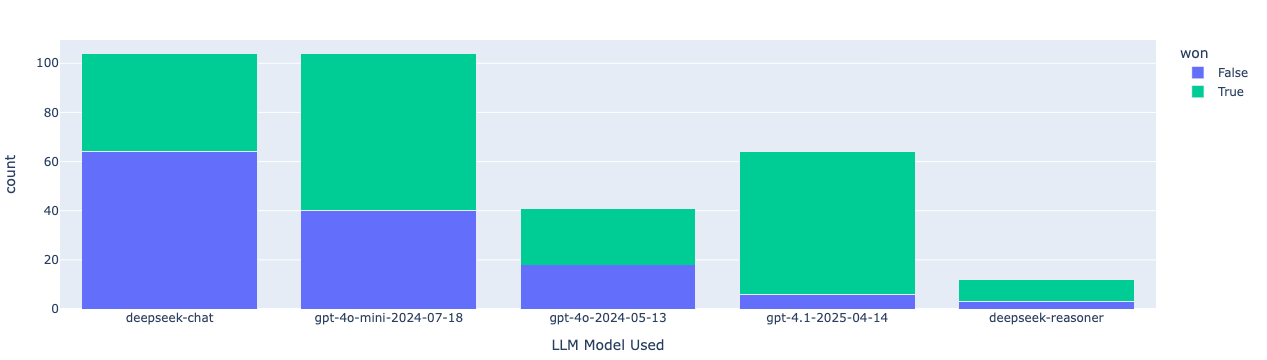

In [118]:
#| label: fig-wins-bymodel

llm_bymodels = llm_rounds_df.explode(["players", "roles", "models"])
llm_bymodels["won"] = False
llm_bymodels.loc[((llm_bymodels["winner"] == "Werewolves") == (llm_bymodels["roles"] == "Werewolf")),  "won"] = True

fig = px.bar(llm_bymodels[["models", "won"]].value_counts().reset_index(), x="models", y="count", color="won", barmode="stack")
fig.update_layout(xaxis_title="LLM Model Used", height=300)
fig.show()

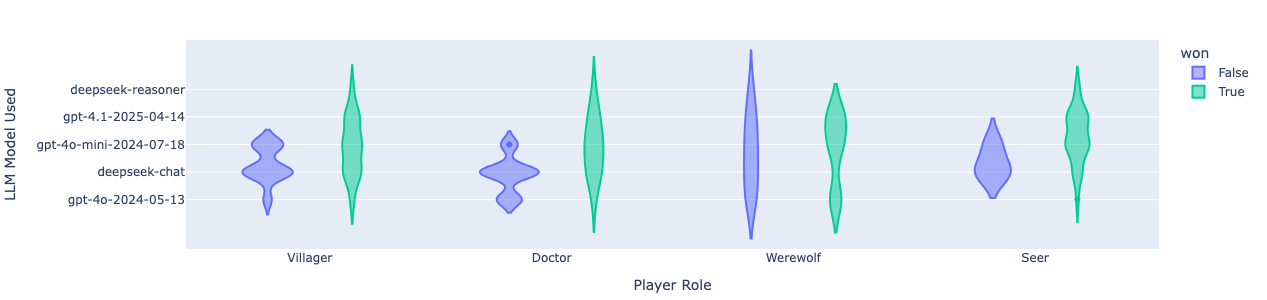

In [119]:
#| label: fig-wins-bymodelrole

fig = px.violin(llm_bymodels, x="roles", y="models", color="won")
fig.update_layout(yaxis_title="LLM Model Used", xaxis_title="Player Role", height=300)
fig.show()

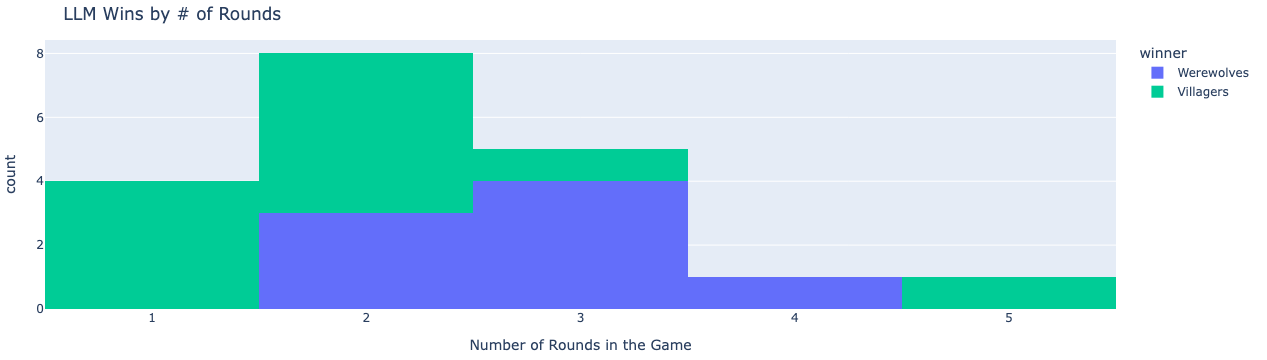

In [120]:
#| label: fig-llm-winrounds
#| fig-cap: The LLM wins, by how many rounds that partiticular game had.

fig = px.histogram(llm_rounds_df.groupby("game_id")[["round", "winner"]].last(), x="round", color="winner")
fig.update_layout(title="LLM Wins by # of Rounds", xaxis_title="Number of Rounds in the Game", height=300)
fig.show()

### Strategies used

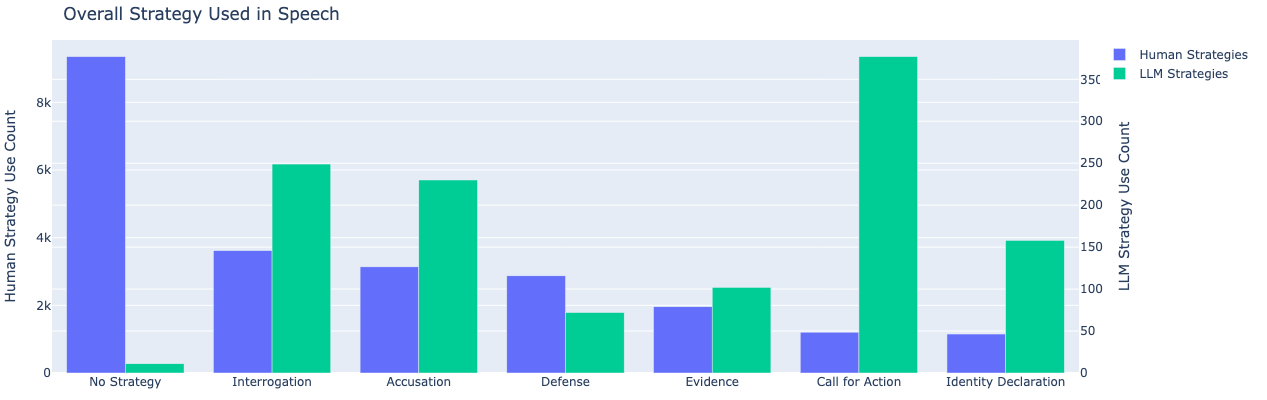

In [121]:
#| label: fig-strat-overall
#| fig-cap: The persuasion strategies used by humans vs LLMs; scales are seperate per dataset for more even comparison.

## Overall strategy used bar plot
hum_strats = hum_text_df["strategy"].explode().value_counts().reset_index()
llm_strats = llm_text_df["strategy"].explode().value_counts().reset_index()

fig = go.Figure(
    data=[
        go.Bar(name='Human Strategies', x=hum_strats["strategy"], y=hum_strats["count"], yaxis='y', offsetgroup=1),
        go.Bar(name='LLM Strategies', x=llm_strats["strategy"], y=llm_strats["count"], yaxis='y2', offsetgroup=2),
    ],
    layout={
        'yaxis': {'title': 'Human Strategy Use Count'},
        'yaxis2': {'title': 'LLM Strategy Use Count', 'overlaying': 'y', 'side': 'right'},
        "title": "Overall Strategy Used in Speech"
    }
)
# Change the bar mode
fig.update_layout(barmode='group', height=400)
fig.show()

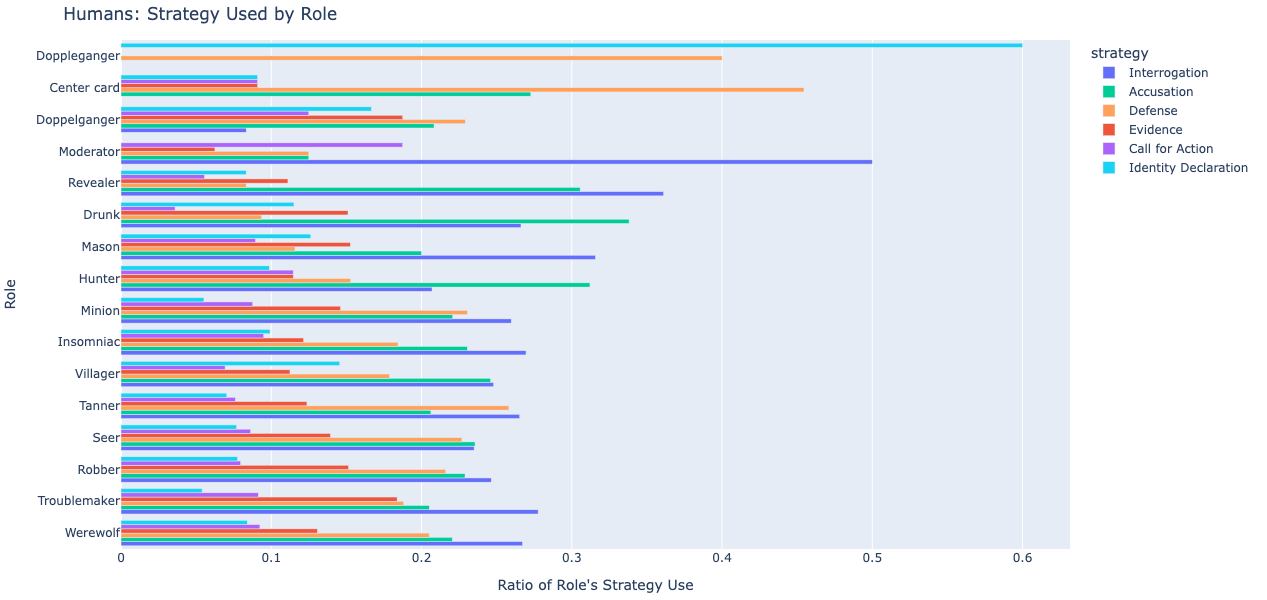

In [122]:
#| label: fig-stratbyrole-hum

## Strategy used by player role bar plot
hum_strats = hum_text_df[["strategy", "end_role"]].explode("strategy").value_counts().reset_index()
hum_strats = hum_strats[hum_strats["strategy"] != "No Strategy"] # Don't include no strat
hum_strats["count"] = hum_strats.groupby("end_role")["count"].transform(lambda x: x/x.sum()) # Make scaled by total strategy use per role

fig = px.bar(hum_strats, y="end_role", x="count", color="strategy", barmode="group")
fig.update_layout(xaxis_title="Ratio of Role's Strategy Use", yaxis_title="Role", title="Humans: Strategy Used by Role", height=600)
fig.show()

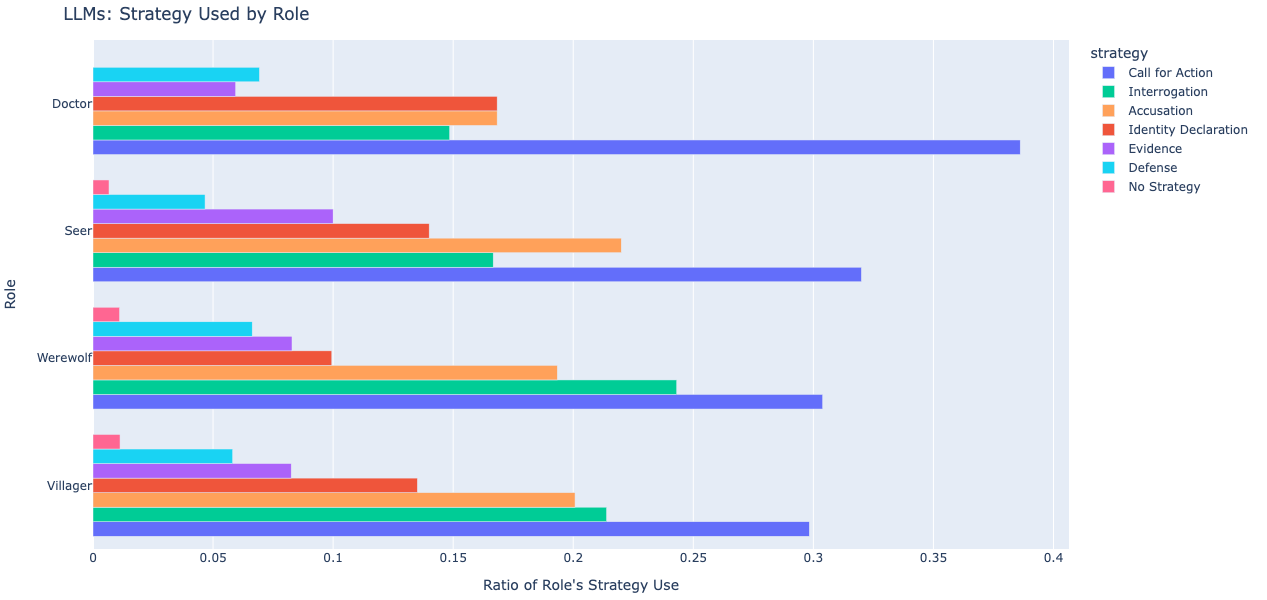

In [123]:
#| label: fig-stratbyrole-llms

llm_strats = llm_text_df[["players", "roles", "speaker", "strategy"]].explode(["players", "roles"])
llm_strats = llm_strats[llm_strats["players"] == llm_strats["speaker"]]
llm_strats = llm_strats.explode("strategy")[["roles", "strategy"]].value_counts().reset_index()
llm_strats["count"] = llm_strats.groupby("roles")["count"].transform(lambda x: x/x.sum()) # Make scaled by total strategy use per role

fig = px.bar(llm_strats, y="roles", x="count", color="strategy", barmode="group")
fig.update_layout(xaxis_title="Ratio of Role's Strategy Use", yaxis_title="Role", title="LLMs: Strategy Used by Role", height=600)
fig.show()

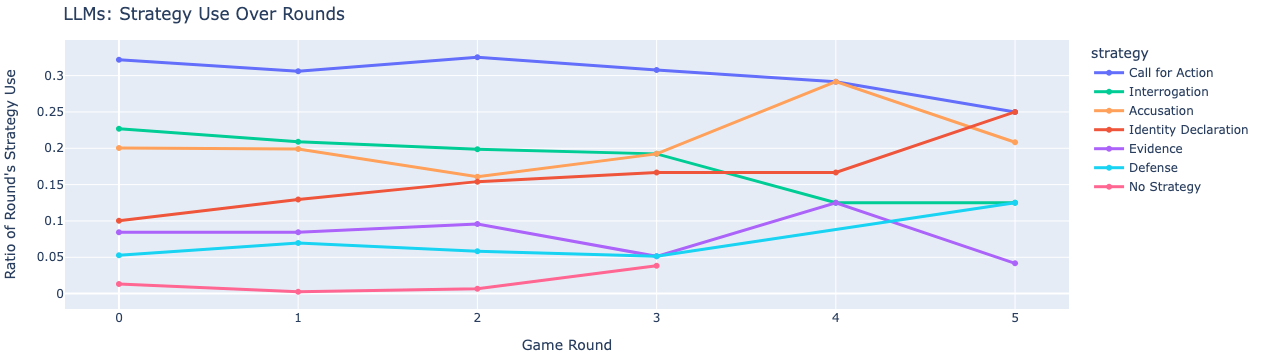

In [124]:
#| label: fig-llm-stratbyround
#| column: margin
## Strategy used over time (LLMs)

llm_strats_byround = llm_text_df.explode("strategy").groupby("round")["strategy"].value_counts().reset_index()
# Make scaled by total strategy use per round
llm_strats_byround["count"] = llm_strats_byround.groupby("round")["count"].transform(lambda x: x/x.sum()) 

fig = px.line(llm_strats_byround, x="round", y="count", color="strategy", markers=True)
fig.update_traces(line_width=3)
fig.update_layout(yaxis_title="Ratio of Round's Strategy Use", xaxis_title="Game Round", title="LLMs: Strategy Use Over Rounds")
fig.show()

In [125]:
## PCA/Clustering of strategies?

### Talking time vs. was voted on

Investigating whether a vote was cast upon a person, compared to how much they talked

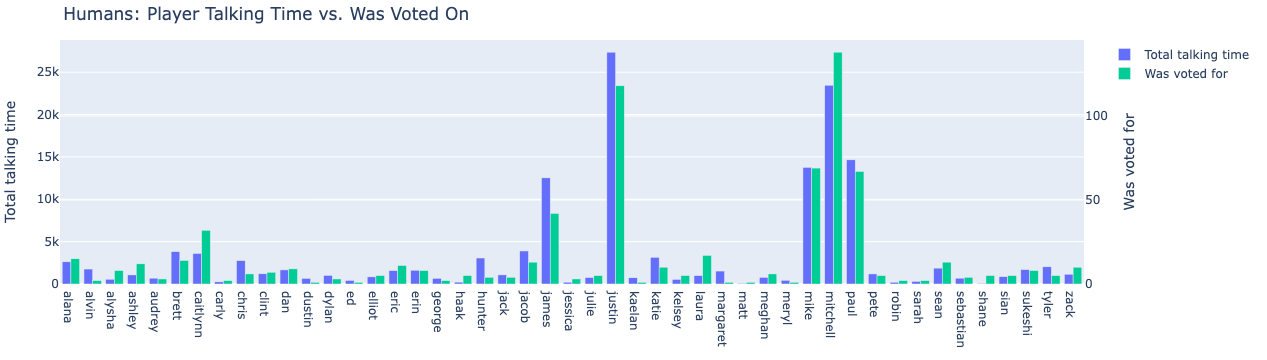

In [126]:
#| label: fig-talking-hum
#| column: page

## Humans dataset
hum_talklen = hum_text_df.groupby("speaker")["utterance_length"].sum().reset_index()
hum_votedon = hum_rounds_df["voted_for"].value_counts().reset_index()
cmp = hum_talklen.merge(hum_votedon, left_on="speaker", right_on="voted_for", how="inner")\
                .rename(columns={"speaker": "Player", "utterance_length": "Total talking time", "count": "Was voted for"})

fig = go.Figure(
    data=[
        go.Bar(name='Total talking time', x=cmp["Player"], y=cmp["Total talking time"], yaxis='y', offsetgroup=1),
        go.Bar(name='Was voted for', x=cmp["Player"], y=cmp["Was voted for"], yaxis='y2', offsetgroup=2)
    ],
    layout={
        'yaxis': {'title': 'Total talking time'},
        'yaxis2': {'title': 'Was voted for', 'overlaying': 'y', 'side': 'right'},
        "title": "Humans: Player Talking Time vs. Was Voted On"
    }
)
# Change the bar mode
fig.update_layout(barmode='group', height=400)
fig.show()

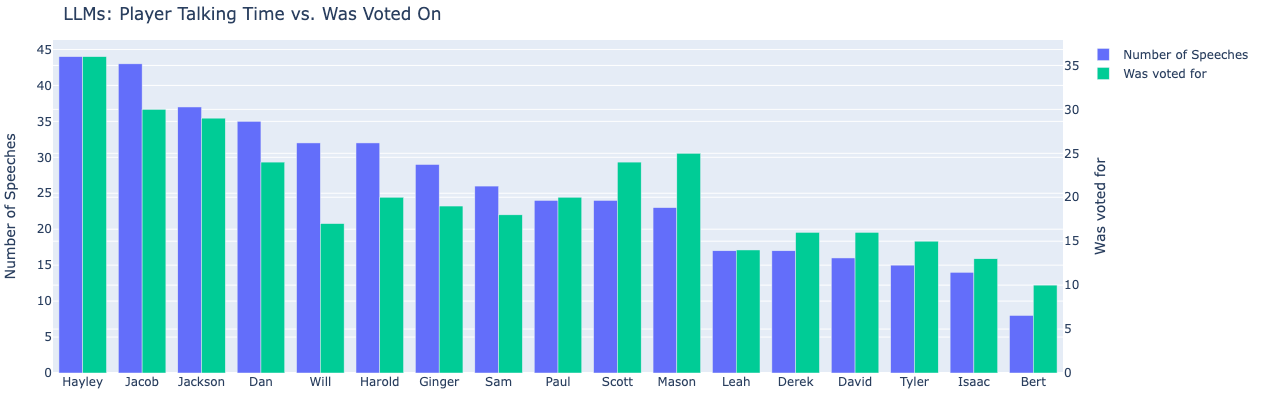

In [127]:
#| label: fig-talking-llm
#| column: page


## LLMs dataset
llm_talklen = llm_text_df["speaker"].value_counts().reset_index()
llm_votes = llm_text_df.groupby(["game_id", "round"])["votes"].first().reset_index().dropna()["votes"].apply(ast.literal_eval)
voted_on = {}
for vote in llm_votes:
    for k, v in vote.items():
        if not k in voted_on:
            voted_on[k] = 1
        else:
            voted_on[k] += 1
llm_votedon = pd.DataFrame(voted_on.items()).rename(columns={0: "speaker", 1: "Voted On"})

cmp = llm_talklen.merge(llm_votedon, on="speaker", how="inner")\
                .rename(columns={"speaker": "Player", "count": "Number of Speeches"})

fig = go.Figure(
    data=[
        go.Bar(name='Number of Speeches', x=cmp["Player"], y=cmp["Number of Speeches"], yaxis='y', offsetgroup=1),
        go.Bar(name='Was voted for', x=cmp["Player"], y=cmp["Voted On"], yaxis='y2', offsetgroup=2)
    ],
    layout={
        'yaxis': {'title': 'Number of Speeches'},
        'yaxis2': {'title': 'Was voted for', 'overlaying': 'y', 'side': 'right'},
        "title": "LLMs: Player Talking Time vs. Was Voted On"
    }
)
# Change the bar mode
fig.update_layout(barmode='group', height=400)
fig.show()

### Voting spread

How unified vs spread out the votes were per round

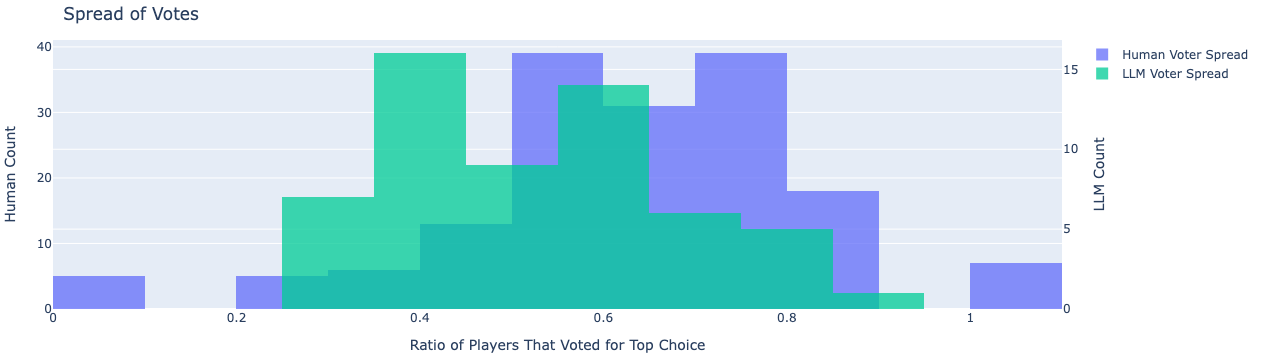

In [128]:
#| label: fig-voting-spread

def human_spread(group):
    # Drop NaN or None values in voted_for
    votes = group['voted_for'].dropna()
    # Count the votes
    vote_counts = votes.value_counts()
    if len(vote_counts) == 0:
        return 0
    # Get most voted for person / total votes
    return vote_counts.iloc[0] / len(group)
hum_vote_spread = hum_rounds_df.groupby("game_id").apply(human_spread).reset_index()[0]

llm_vote_spread = []
for vote in llm_votes:
    llm_vote_spread.append(Counter(vote.values()).most_common(1)[0][1] / len(vote))


fig = go.Figure(
    data=[
        go.Histogram(name='Human Voter Spread', x=hum_vote_spread, opacity=0.75, yaxis='y', offsetgroup=1),
        go.Histogram(name='LLM Voter Spread', x=llm_vote_spread, opacity=0.75, yaxis='y2', offsetgroup=2),
    ],
    layout=dict(
        title="Spread of Votes",
        xaxis=dict(title="Ratio of Players That Voted for Top Choice"),
        yaxis={"title": "Human Count"},
        yaxis2={'overlaying': 'y', 'side': 'right', "title": "LLM Count"},
    )
)
# Change the bar mode
fig.update_layout(barmode='overlay', height=400)
fig.show()

In [129]:
hum_text_df["text"]

0        I don't know why this is necessary considering saw the card.
1                                                    I am a Villager.
2                                                       Like, I mean-
3                                                       But, I-I-I-I-
4             Continue. Well, I guess we don't really need to, do we?
                                     ...                             
21067                                                       We could.
21068                                                          Justin
21069                               It's just Justin, Justin, Justin.
21070                                                 Just inception.
21071                                       So we're voting Mitchell?
Name: text, Length: 21072, dtype: object

In [18]:
llm_text_df["text"]

0      Alright everyone, it's unfortunate that we've ...
1      Thanks, Will. It's indeed a tough start losing...
2      Thanks, Hayley. I agree with you and Will that...
3      Jacob, I appreciate you pointing out that I wa...
4      Thanks for addressing that, Jackson. I complet...
                             ...                        
250    Hayley, your accusations are unfounded and ser...
251    Harold, your insistence on labeling me as the ...
252    Hayley, your tactics of distraction are transp...
253    I want to echo what Harold has shared with us:...
254    I appreciate the spirited debate, but it's cru...
Name: text, Length: 255, dtype: object